# **BUSSINESS UNDERSTANDING**

Sumber Data [Depression and Mental Health](https://www.kaggle.com/datasets/shashwatwork/depression-and-mental-health-data-analysis/data)

#### **1. Latar Belakang**
Data ini mencakup informasi tentang dampak pandemi terhadap kesehatan mental individu, termasuk tantangan sosial, tingkat stres, dan perubahan kebiasaan. Dengan data ini, kita dapat memahami bagaimana berbagai komponen mempengaruhi kesejahteraan mental masyarakat dalam berbagai kelompok usia dan pekerjaan.

#### **2. Tujuan Analisis**
- Menganalisis apakah semakin lama di dalam ruangan, stres semakin meningkat.
- Menganalisis apakah umur dan pekerjaan dapat mempengaruhi pertumbuhan stres dan kelompok mana yang paling tinggi mengalami pertumbuhan stres.
- Menganalisis apakah ada perbedaan tingkat stres berdasarkan gender dan mengetahui gender mana yang lebih rentan mengalami peningkatan stres.
- Menganalisis apakah ada korelasi antara kelemahan bersosial dengan perubahan kebiasaan.
- Melakukan analisis dan visualisasi perubahan mood.
- Melakukan analisis dan visualisasi frustrasi selama karantina.

# **DATA PREPARATION**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
file_path = "/content/mental_health_finaldata_1.csv"
df = pd.read_csv(file_path)

In [32]:
df

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [22]:
print("\nMenampilkan jumlah baris dan kolom:")
print(df.shape)


Menampilkan jumlah baris dan kolom:
(824, 13)


In [23]:
print("\nMenampilkan tipe data setiap kolom:")
print(df.dtypes)


Menampilkan tipe data setiap kolom:
Age                        object
Gender                     object
Occupation                 object
Days_Indoors               object
Growing_Stress             object
Quarantine_Frustrations    object
Changes_Habits             object
Mental_Health_History      object
Weight_Change              object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
dtype: object


In [24]:
print("\nMenampilkan statistik deskriptif:")
df.describe()


Menampilkan statistik deskriptif:


,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


In [25]:
(df.isna().sum()/len(df))*100

,0
Age,0.0
Gender,0.0
Occupation,0.0
Days_Indoors,0.0
Growing_Stress,0.0
Quarantine_Frustrations,0.0
Changes_Habits,0.0
Mental_Health_History,0.0
Weight_Change,0.0
Mood_Swings,0.0


In [34]:
df = df.drop('Work_Interest', axis=1)

In [35]:
df = df.drop('Weight_Change', axis=1)

In [36]:
df = df.drop('Coping_Struggles', axis=1)

In [37]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Mood_Swings,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Medium,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,High,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,Medium,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Medium,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Medium,No


In [38]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Mood_Swings              824 non-null    object
 9   Social_Weakness          824 non-null    object
dtypes: object(10)
memory usage: 64.5+ KB


In [39]:
df[df.duplicated()]

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Mood_Swings,Social_Weakness
736,16-20,Female,Student,Go out Every day,No,Maybe,No,Maybe,Low,No
738,25-30,Female,Housewife,1-14 days,Yes,Maybe,Yes,Yes,Medium,Maybe


In [40]:
print('Melakukan perhitungan jumlah responden:')

hitung_kolom = [
    'Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History', 'Mood_Swings', 'Quarantine_Frustrations', 'Social_Weakness'
]

for col in hitung_kolom:
    print(f"\nPerhitungan jumlah kemunculan nilai masing-masing kolom: '{col}':")
    print(df[col].value_counts())
    print("-" * 50)

Melakukan perhitungan jumlah responden:

Perhitungan jumlah kemunculan nilai masing-masing kolom: 'Age':
Age
30-Above    222
16-20       211
25-30       205
20-25       186
Name: count, dtype: int64
--------------------------------------------------

Perhitungan jumlah kemunculan nilai masing-masing kolom: 'Gender':
Gender
Female    434
Male      390
Name: count, dtype: int64
--------------------------------------------------

Perhitungan jumlah kemunculan nilai masing-masing kolom: 'Occupation':
Occupation
Housewife    185
Student      180
Corporate    159
Others       155
Business     145
Name: count, dtype: int64
--------------------------------------------------

Perhitungan jumlah kemunculan nilai masing-masing kolom: 'Days_Indoors':
Days_Indoors
31-60 days            171
1-14 days             170
Go out Every day      168
More than 2 months    160
15-30 days            155
Name: count, dtype: int64
--------------------------------------------------

Perhitungan jumlah kemunculan 

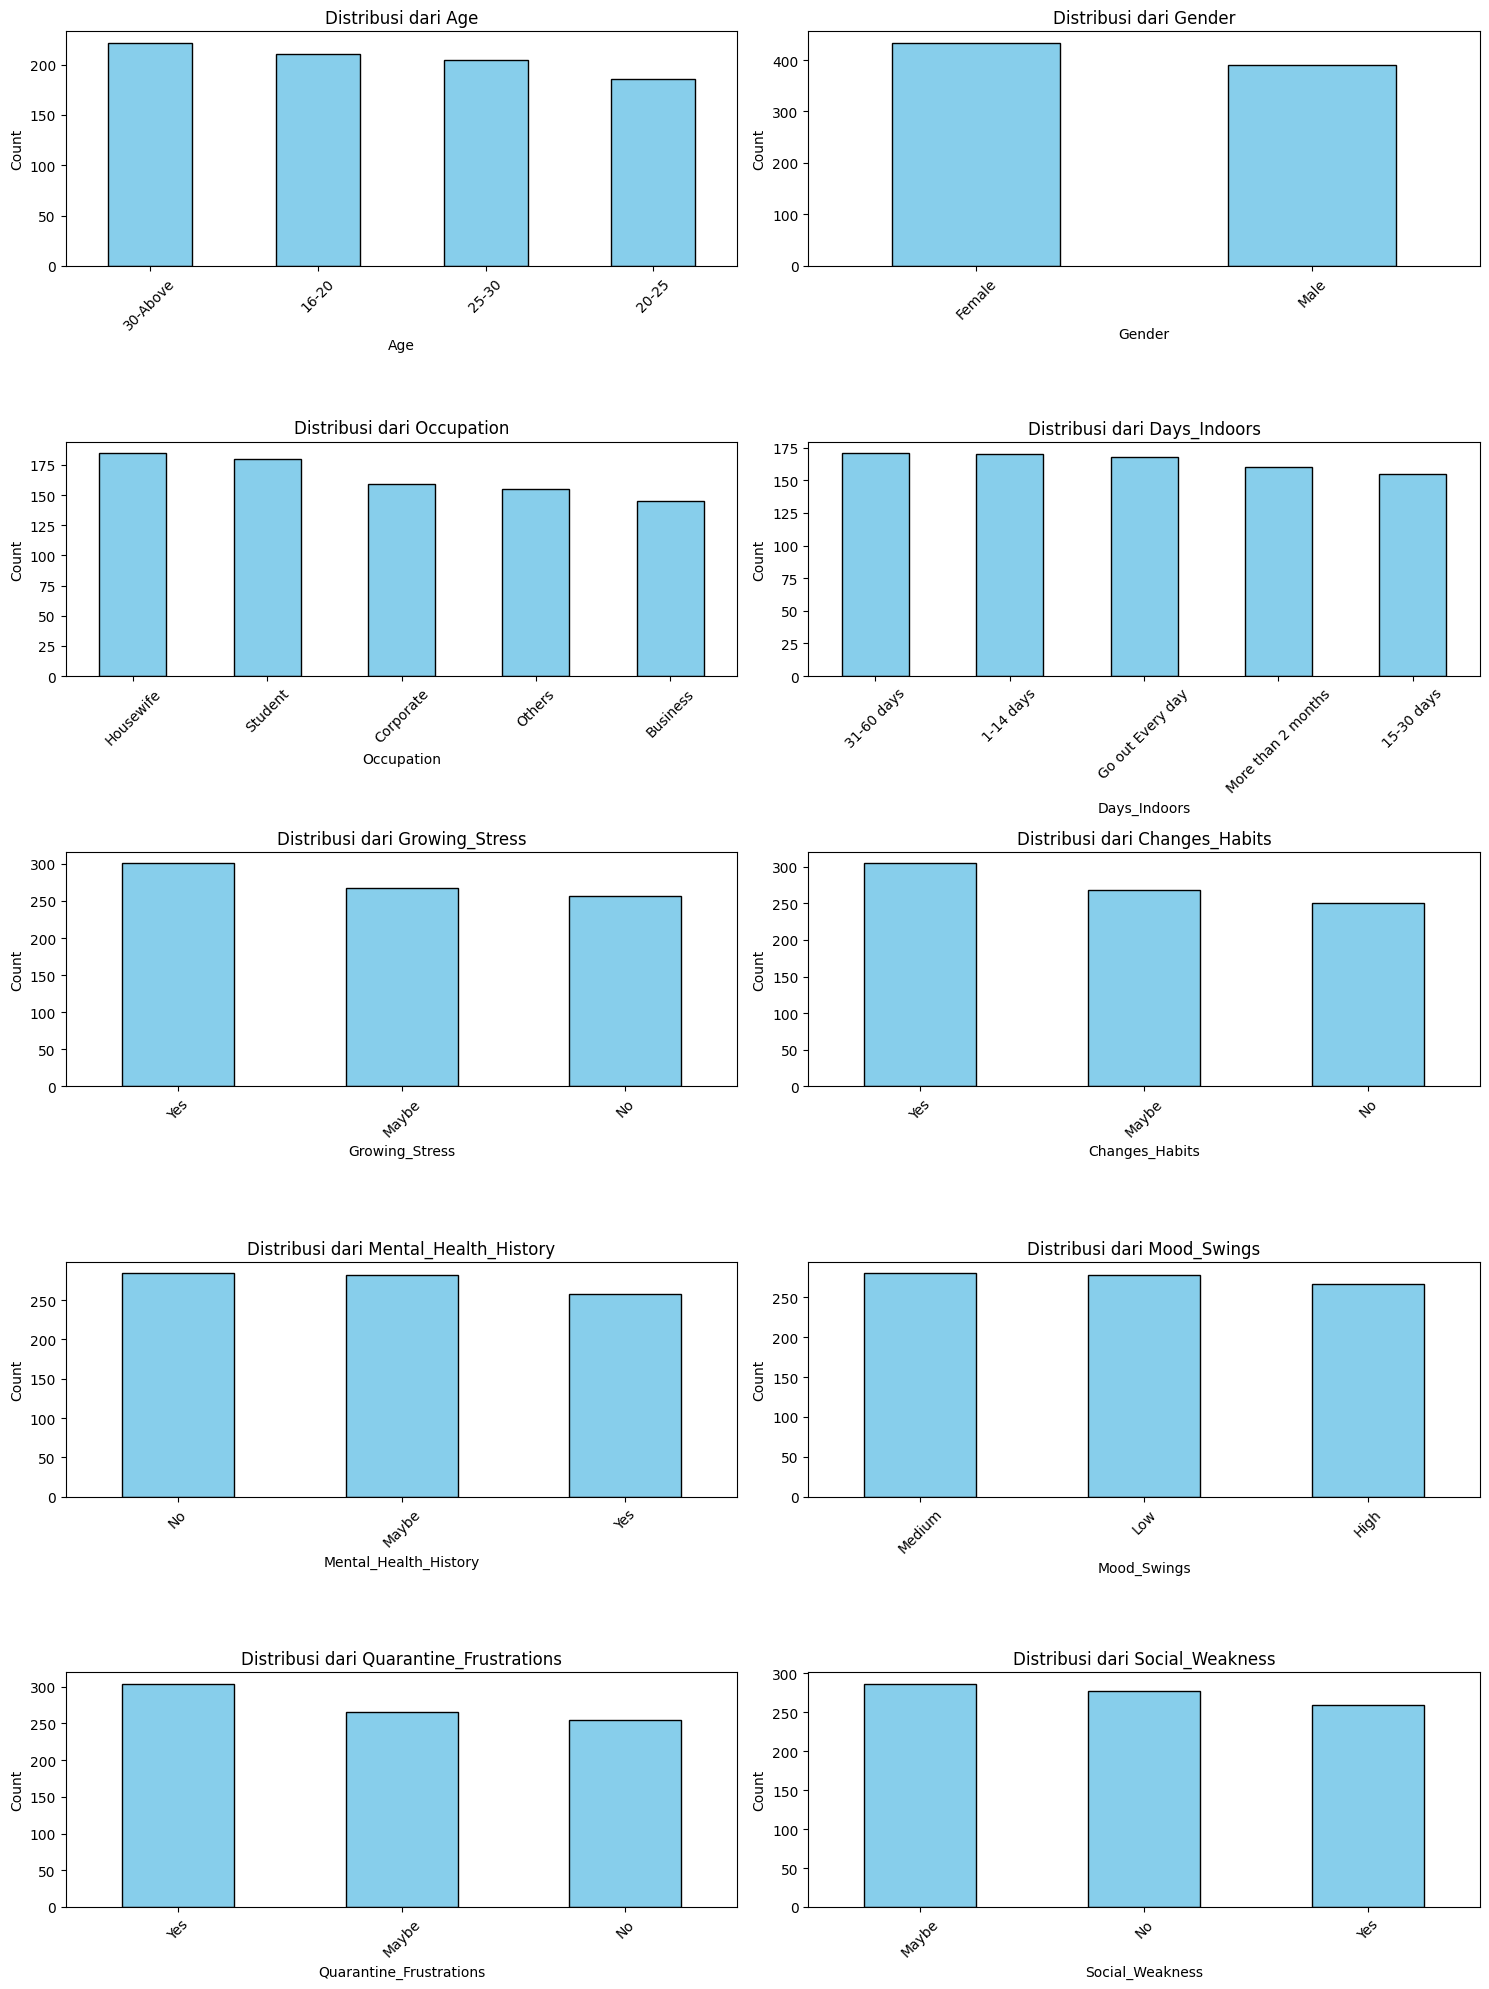

In [41]:
hitung_kolom = [
    'Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
    'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
    'Quarantine_Frustrations', 'Social_Weakness'
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(hitung_kolom):
    df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribusi dari {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **DATA ANALYSIS AND DATA VISUALIZATION**

## Melakukan analisis dan visualisasi hubungan antara banyaknya jumlah hari di dalam rumah dan pertumbuhan stres.

In [ ]:
print("Distribusi growing stress berdasarkan jumlah hari dalam ruangan:\n")
stress_counts = df.groupby("Days_Indoors")["Growing_Stress"].value_counts().unstack()
print(stress_counts)

Growing_Stress      Maybe  No  Yes
Days_Indoors                      
1-14 days              46  48   76
15-30 days             51  56   48
31-60 days             54  53   64
Go out Every day       59  56   53
More than 2 months     57  43   60


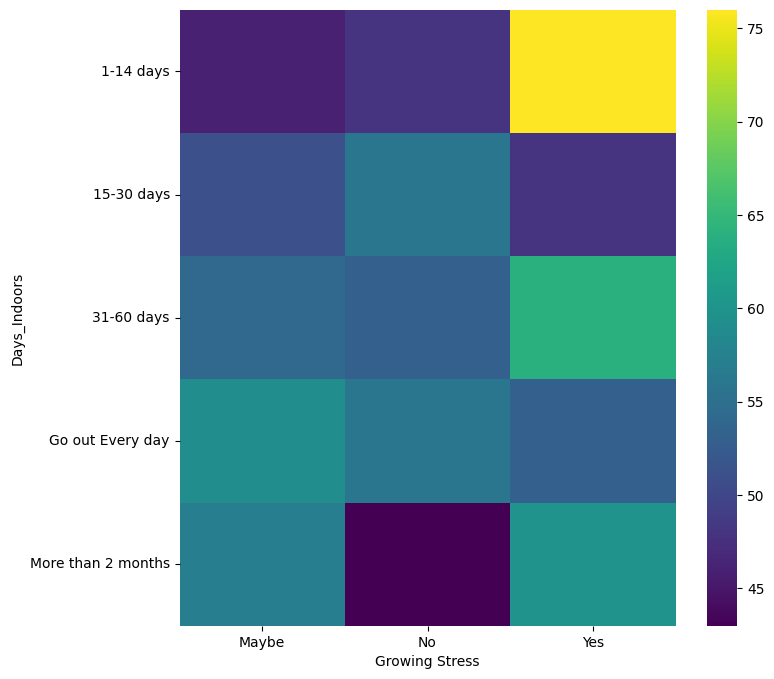

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Days_Indoors'].value_counts()
    for x_label, grp in df.groupby('Growing_Stress')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Growing Stress')
_ = plt.ylabel('Days_Indoors')

Berdasarkan heatmap, terdapat hubungan yang signifikan antara durasi seseorang berada di dalam ruangan dengan tingkat stres yang dialami. Individu yang menghabiskan 1-14 hari di dalam ruangan cenderung mengalami peningkatan stres yang lebih tinggi dibandingkan kelompok lainnya, sebagaimana ditunjukkan oleh intensitas warna yang lebih terang pada kategori "Yes". Sebaliknya, mereka yang tetap pergi keluar setiap hari memiliki tingkat stres yang lebih rendah secara keseluruhan.

## Melakukan analisis dan visualisasi hubungan antara pertumbuhan stres dengan pekerjaan.

In [ ]:
stress_by_occupation = df.groupby("Occupation")["Growing_Stress"].value_counts().unstack()
print("Distribusi growing stress berdasarkan pekerjaan:\n")
print(stress_by_occupation)

Distribusi growing stress berdasarkan pekerjaan:

Growing_Stress  Maybe  No  Yes
Occupation                    
Business           47  44   54
Corporate          47  49   63
Housewife          65  56   64
Others             50  51   54
Student            58  56   66


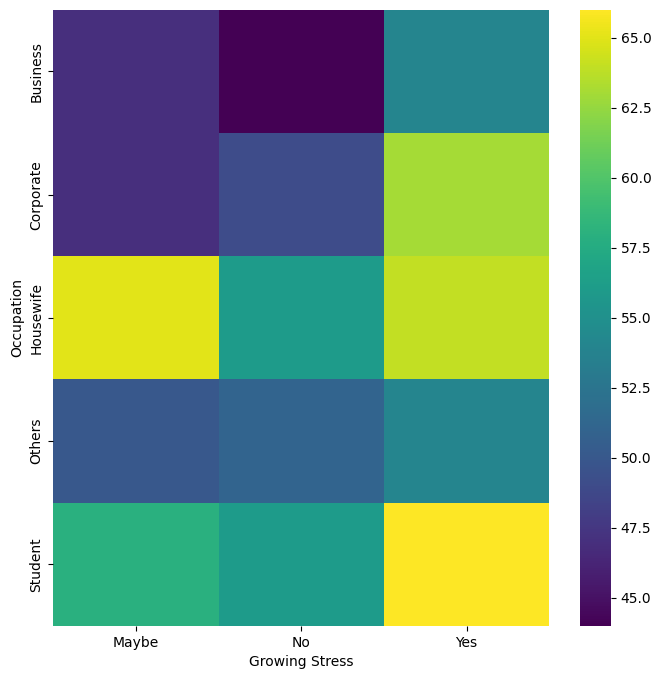

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Occupation'].value_counts()
    for x_label, grp in df.groupby('Growing_Stress')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Growing Stress')
_ = plt.ylabel('Occupation')

Berdasarkan heatmap, tingkat stres yang meningkat tampak lebih dominan pada kategori "Housewife" dan "Student", terutama pada bagian "Yes" yang menunjukkan bahwa mereka mengalami stres yang lebih tinggi dibandingkan kategori pekerjaan lainnya. Sementara itu, individu yang bekerja di sektor bisnis dan kategori "Others" cenderung memiliki tingkat stres yang lebih merata tanpa lonjakan yang signifikan.

## Menganalisis apakah ada perbedaan tingkat stres berdasarkan gender dan mengetahui gender mana yang lebih rentan mengalami peningkatan stres.

In [ ]:
print("Distribusi growing stress berdasarkan gender:\n")
stress_counts = df.groupby("Gender")["Growing_Stress"].value_counts().unstack()
print(stress_counts)

Distribusi growing stress berdasarkan gender:

Growing_Stress  Maybe   No  Yes
Gender                         
Female            130  131  173
Male              137  125  128


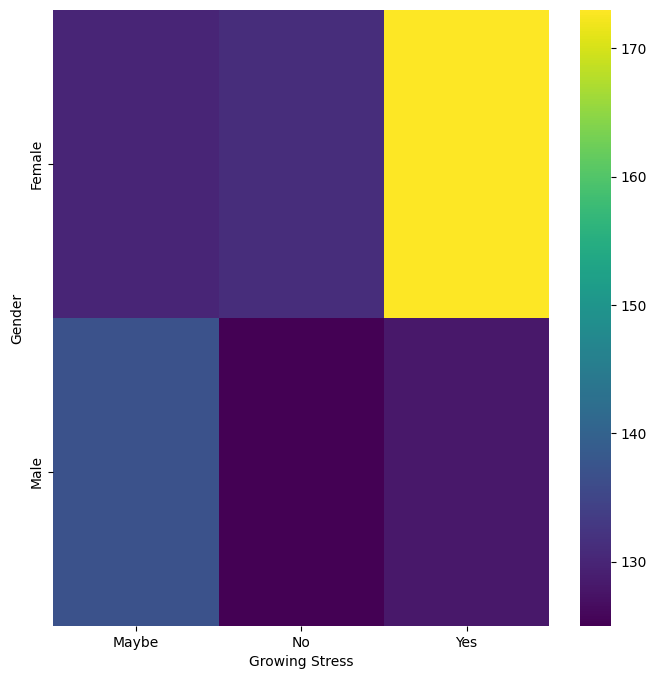

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in df.groupby('Growing_Stress')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Growing Stress')
_ = plt.ylabel('Gender')

Berdasarkan heatmap, terlihat bahwa tingkat stres yang meningkat ("Yes") lebih dominan pada kategori perempuan dibandingkan laki-laki. Hal ini menunjukkan bahwa perempuan lebih cenderung mengalami peningkatan stres dibandingkan laki-laki dalam konteks ini. Sementara itu, kategori laki-laki memiliki distribusi yang lebih merata, dengan nilai yang lebih rendah pada kategori "No," yang menunjukkan bahwa mereka lebih sedikit melaporkan stres yang meningkat.

## Menganalisis apakah ada korelasi antara kelemahan bersosial dengan perubahan kebiasaan.

In [43]:
print("Distribusi perubahan kebiasaan dengan kelemahan bersosial:\n")
stress_counts = df.groupby("Social_Weakness")["Changes_Habits"].value_counts().unstack()
print(stress_counts)

Distribusi perubahan kebiasaan dengan kelemahan bersosial:

Changes_Habits   Maybe  No  Yes
Social_Weakness                
Maybe               91  83  113
No                  90  89   99
Yes                 87  79   93


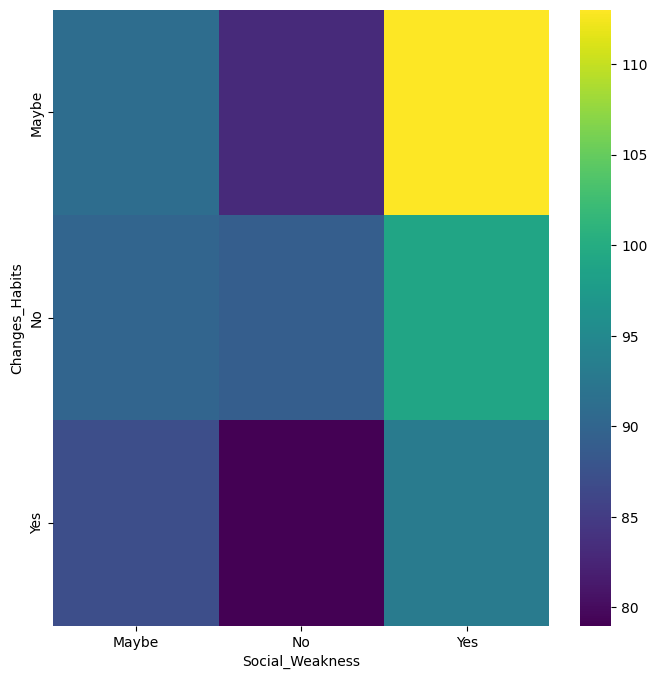

In [ ]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Social_Weakness'].value_counts()
    for x_label, grp in df.groupby('Changes_Habits')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Social_Weakness')
_ = plt.ylabel('Changes_Habits')

Berdasarkan heatmap yang diberikan, terdapat hubungan antara perubahan kebiasaan (Changes-Habits) dan kelemahan sosial (Social Weakness). Dari pola warna yang terlihat, individu yang mengalami perubahan kebiasaan cenderung memiliki tingkat kelemahan sosial yang lebih tinggi, terutama dalam kategori "Yes" pada kedua variabel. Hal ini menunjukkan bahwa perubahan dalam kebiasaan seseorang dapat berdampak pada tingkat interaksi sosial mereka, dengan kemungkinan menyebabkan peningkatan isolasi sosial atau kesulitan dalam bersosialisasi.

## Melakukan analisis dan visualisasi perubahan mood.

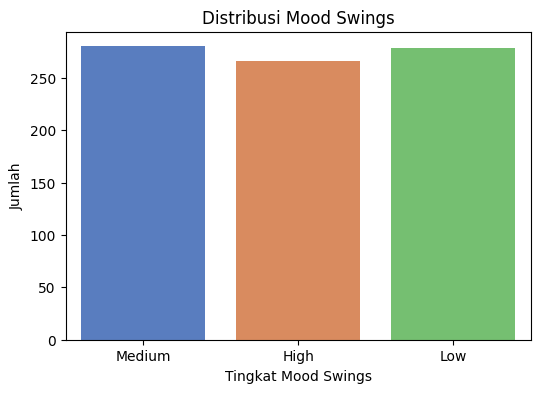

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x="Mood_Swings", data=df, hue="Mood_Swings", legend=False, palette="muted")
plt.title("Distribusi Mood Swings")
plt.xlabel("Tingkat Mood Swings")
plt.ylabel("Jumlah")
plt.show()


Visualisasi menunjukkan distribusi tingkat mood swings di antara responden, dengan kategori Medium, High, dan Low yang memiliki jumlah yang relatif seimbang. Namun, terlihat bahwa mayoritas individu memiliki mood swings pada tingkat Medium dan Low, sementara jumlah responden dengan High mood swings juga cukup signifikan. Ini mengindikasikan bahwa fluktuasi suasana hati adalah fenomena yang cukup umum, tetapi sebagian individu mengalami perubahan suasana hati yang lebih ekstrem.

## Melakukan analisis dan visualisasi frustrasi selama karantina.

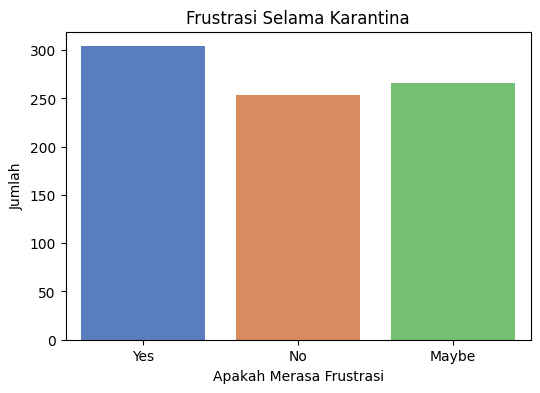

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x="Quarantine_Frustrations", data=df, hue="Quarantine_Frustrations", legend=False, palette="muted")
plt.title("Frustrasi Selama Karantina")
plt.xlabel("Apakah Merasa Frustrasi")
plt.ylabel("Jumlah")
plt.show()

Berdasarkan visualisasi di atas, mayoritas responden mengaku mengalami frustrasi selama masa karantina (Yes), sementara sebagian lainnya tidak merasa frustrasi (No) atau merasa ragu-ragu (Maybe). Hal ini menunjukkan bahwa karantina berdampak signifikan terhadap kesehatan mental banyak individu, dengan tingkat frustrasi yang cukup tinggi. Sementara itu, kelompok Maybe yang cukup besar bisa mengindikasikan bahwa beberapa individu mengalami perasaan campur aduk atau kurang menyadari dampak psikologis dari situasi tersebut.

# **KESIMPULAN**

Kesimpulan yang dapat diambil dari analisis ini adalah bahwa kesehatan mental selama pandemi menjadi isu yang semakin penting untuk diperhatikan. Berbagai faktor seperti stres, perubahan kebiasaan, isolasi sosial, dan tingkat interaksi dengan lingkungan berpengaruh signifikan terhadap kondisi psikologis seseorang. Individu yang mengalami peningkatan stres cenderung menunjukkan perubahan kebiasaan yang lebih besar, serta memiliki tingkat kecemasan yang lebih tinggi. Selain itu, kurangnya interaksi sosial juga menjadi faktor yang memperburuk kesehatan mental, terutama bagi mereka yang memiliki keterbatasan dalam bersosialisasi. Oleh karena itu, penting untuk meningkatkan kesadaran akan kesehatan mental dan menyediakan dukungan yang lebih baik, baik melalui edukasi, layanan psikologis, maupun lingkungan yang lebih suportif. Dengan langkah-langkah yang tepat, dampak negatif dari stres dan isolasi dapat diminimalkan, sehingga kesejahteraan mental masyarakat dapat lebih terjaga.